### Sequential Information

<img src="https://upload.wikimedia.org/wikipedia/commons/0/06/WaveSampling.png"/>

<img src="https://www.visualcapitalist.com/wp-content/uploads/2017/09/share-of-gdp-share.jpg"/>

**Recurrent neural networks (RNNs) are designed to better handle sequential information. RNNs introduce state variables to store past information, together with the current inputs, to determine the current outputs.**

<img src="https://d2l.ai/_images/ftse100.png" />

Let us denote the prices by $x_t$, i.e., at time step $t \in \mathbb{Z}^+$ we observe price $x_t$. Note that for sequences in this text, $t$ will typically be discrete and vary over integers or its subset. Suppose that a trader who wants to do well in the stock market on day $t$ predicts $x_t$ via

$x_t \sim P(x_t \mid x_{t-1}, \ldots, x_1)$

### Autoregressive Models

$x_{t-1}, \ldots, x_{t-\tau},$ where $t > \tau$

### Latent Autoregressive Models

$x_t \sim P(x_t \mid h_{t})$, where $h_t = g(h_{t-1}, x_{t-1})$

<img src="https://d2l.ai/_images/sequence-model.svg" />

### Download Template

In [1]:
!wget https://gist.githubusercontent.com/b1nch3f/b702d2ebfd2c751aa21b68c7425e0d4e/raw/c77225291924a8d2c33c210d74f2744210b6b716/d2l.py -O d2l.py

--2022-07-16 17:15:20--  https://gist.githubusercontent.com/b1nch3f/b702d2ebfd2c751aa21b68c7425e0d4e/raw/c77225291924a8d2c33c210d74f2744210b6b716/d2l.py
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59707 (58K) [text/plain]
Saving to: ‘d2l.py’

d2l.py              100%[===================>]  58.31K  --.-KB/s    in 0.007s  

2022-07-16 17:15:20 (7.73 MB/s) - ‘d2l.py’ saved [59707/59707]



### Training

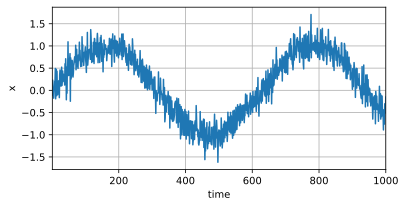

In [2]:
%matplotlib inline
import tensorflow as tf
import d2l

T = 1000  # Generate a total of 1000 points
time = tf.range(1, T + 1, dtype=tf.float32)
x = tf.sin(0.01 * time) + tf.random.normal([T], 0, 0.2)
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

In [3]:
tau = 4
features = tf.Variable(tf.zeros((T - tau, tau)))
for i in range(tau):
    features[:, i].assign(x[i: T - tau + i])
labels = tf.reshape(x[tau:], (-1, 1))

batch_size, n_train = 16, 600
# Only the first `n_train` examples are used for training
train_iter = d2l.load_array((features[:n_train], labels[:n_train]),
                            batch_size, is_train=True)

### Model

In [4]:
# Vanilla MLP architecture
def get_net():
    net = tf.keras.Sequential([tf.keras.layers.Dense(10, activation='relu'),
                              tf.keras.layers.Dense(1)])
    return net

# Note: `MeanSquaredError` computes squared error without the 1/2 factor
loss = tf.keras.losses.MeanSquaredError()

### Train

In [5]:
def train(net, train_iter, loss, epochs, lr):
    trainer = tf.keras.optimizers.Adam()
    for epoch in range(epochs):
        for X, y in train_iter:
            with tf.GradientTape() as g:
                out = net(X)
                l = loss(y, out)
                params = net.trainable_variables
                grads = g.gradient(l, params)
            trainer.apply_gradients(zip(grads, params))
        print(f'epoch {epoch + 1}, '
              f'loss: {d2l.evaluate_loss(net, train_iter, loss):f}')

net = get_net()
train(net, train_iter, loss, 5, 0.01)

epoch 1, loss: 0.278061
epoch 2, loss: 0.140113
epoch 3, loss: 0.094567
epoch 4, loss: 0.079206
epoch 5, loss: 0.075618


### Prediction

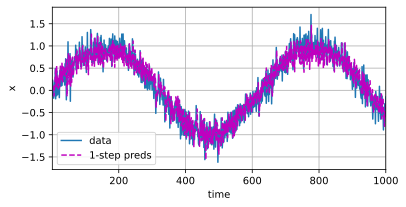

In [6]:
onestep_preds = net(features)
d2l.plot([time, time[tau:]], [x.numpy(), onestep_preds.numpy()], 'time',
         'x', legend=['data', '1-step preds'], xlim=[1, 1000], figsize=(6, 3))